In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import torch

In [2]:
data_path = "/home/steffi/dev/master_thesis/hiding_adversarial_attacks/data/external"
mnist_path = os.path.join(data_path, "MNIST/processed")
fashion_mnist_path = os.path.join(data_path, "FashionMNIST/processed")
cifar10_path = os.path.join(data_path, "CIFAR10")

## DeepFool
adversarial_path = "/home/steffi/dev/master_thesis/hiding_adversarial_attacks/data/preprocessed/adversarial"
mnist_adv_path = os.path.join(adversarial_path, "data-set=MNIST--attack=DeepFool--eps=0.2--cp-run=HAA-946")
fashion_mnist_adv_path = os.path.join(adversarial_path, "data-set=FashionMNIST--attack=DeepFool--eps=0.105--cp-run=HAA-952")
cifar10_adv_path = os.path.join(adversarial_path, "data-set=CIFAR10--attack=DeepFool--eps=0.1--cp-run=HAA-943")

In [3]:
fashion_mnist_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

cifar10_mapping = {
    0: "Airplane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}

# Load data

In [4]:
def load_images_and_labels(data_set_path: str, is_adv: bool = False):
    pt_files = ["training.pt", "test.pt"]
    if is_adv:
        pt_files = ["training_adv.pt", "test_adv.pt"]
    train_images, train_labels = torch.load(os.path.join(data_set_path, pt_files[0]))
    test_images, test_labels = torch.load(os.path.join(data_set_path, pt_files[1]))
    return train_images, train_labels, test_images, test_labels

In [5]:
# Original
mnist_train_img, mnist_train_labels, mnist_test_img, mnist_test_labels = load_images_and_labels(mnist_path)
fashion_mnist_train_img, fashion_mnist_train_labels, fashion_mnist_test_img, fashion_mnist_test_labels = load_images_and_labels(fashion_mnist_path)
cifar10_train_img, cifar10_train_labels, cifar10_test_img, cifar10_test_labels = load_images_and_labels(cifar10_path)

In [6]:
# Adversarial
mnist_train_img_adv, mnist_train_labels_adv, mnist_test_img_adv, mnist_test_labels_adv = load_images_and_labels(mnist_adv_path, is_adv=True)
fashion_mnist_train_img_adv, fashion_mnist_train_labels_adv, fashion_mnist_test_img_adv, fashion_mnist_test_labels_adv = load_images_and_labels(fashion_mnist_adv_path, is_adv=True)
cifar10_train_img_adv, cifar10_train_labels_adv, cifar10_test_img_adv, cifar10_test_labels_adv = load_images_and_labels(cifar10_adv_path, is_adv=True)

In [7]:
df_mnist_train_labels = pd.DataFrame(mnist_train_labels.numpy())
df_mnist_test_labels = pd.DataFrame(mnist_test_labels.numpy())

df_mnist_train_labels_adv = pd.DataFrame(mnist_train_labels_adv.numpy())
df_mnist_test_labels_adv = pd.DataFrame(mnist_test_labels_adv.numpy())

df_fashion_mnist_train_labels = pd.DataFrame(fashion_mnist_train_labels.numpy())
df_fashion_mnist_test_labels = pd.DataFrame(fashion_mnist_test_labels.numpy())

df_fashion_mnist_train_labels_adv = pd.DataFrame(fashion_mnist_train_labels_adv.numpy())
df_fashion_mnist_test_labels_adv = pd.DataFrame(fashion_mnist_test_labels_adv.numpy())

df_cifar10_train_labels = pd.DataFrame(cifar10_train_labels.numpy())
df_cifar10_test_labels = pd.DataFrame(cifar10_test_labels.numpy())

df_cifar10_train_labels_adv = pd.DataFrame(cifar10_train_labels_adv.numpy())
df_cifar10_test_labels_adv = pd.DataFrame(cifar10_test_labels_adv.numpy())

# Q1: How is the distribution of classes in the data sets?

In [8]:
def get_bins(ticks_count):
    return np.arange(0, ticks_count + 1)-0.5

In [9]:
def plot_label_histogram(df_labels, title, bins, xticks, xticklabels):
    ax = sns.histplot(df_labels, legend=None, bins=bins)
    ax.set_title(title)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

## MNIST

### Original

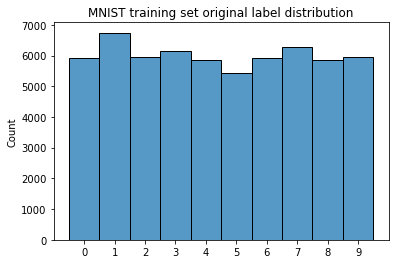

In [10]:
title = "MNIST training set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks
plot_label_histogram(df_mnist_train_labels, title, bins, xticks, xticklabels)

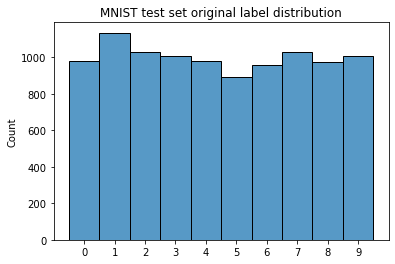

In [11]:
title = "MNIST test set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks
plot_label_histogram(df_mnist_test_labels, title, bins, xticks, xticklabels)

### Adversarial

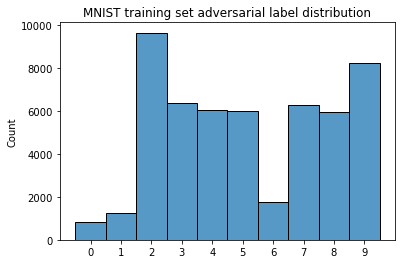

In [12]:
title = "MNIST training set adversarial label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks
plot_label_histogram(df_mnist_train_labels_adv, title, bins, xticks, xticklabels)

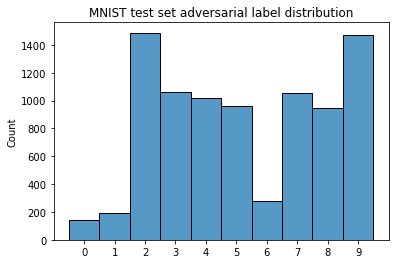

In [13]:
title = "MNIST test set adversarial label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=xticks
plot_label_histogram(df_mnist_test_labels_adv, title, bins, xticks, xticklabels)

### Findings MNIST
* Very few samples were turned into 0, 1 and 6
* Many samples were turned into 2 and 9

## FashionMNIST

## Labels mappings:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

### Original

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

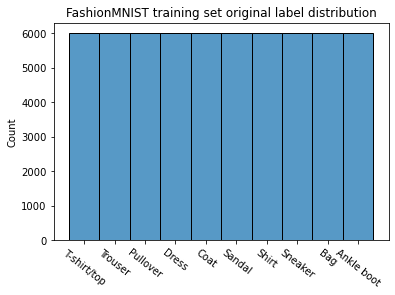

In [14]:
title = "FashionMNIST training set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_histogram(df_fashion_mnist_train_labels, title, bins, xticks, xticklabels)
plt.xticks(rotation=-38)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

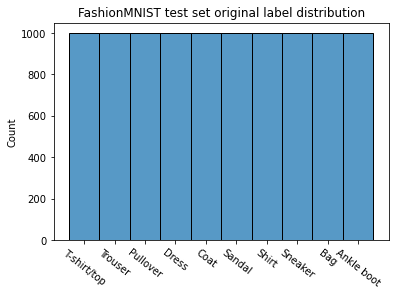

In [15]:
title = "FashionMNIST test set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_histogram(df_fashion_mnist_test_labels, title, bins, xticks, xticklabels)
plt.xticks(rotation=-38)

### Adversarial

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

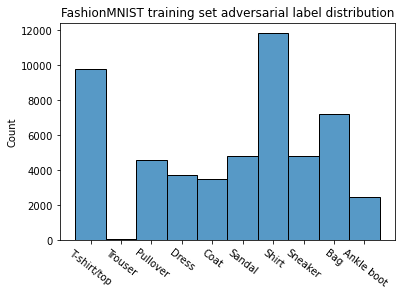

In [16]:
title = "FashionMNIST training set adversarial label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_histogram(df_fashion_mnist_train_labels_adv, title, bins, xticks, xticklabels)
plt.xticks(rotation=-38)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

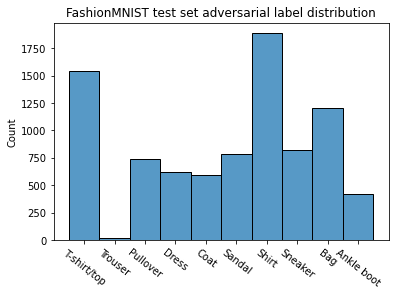

In [17]:
title = "FashionMNIST test set adversarial label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=fashion_mnist_mapping.values()
plot_label_histogram(df_fashion_mnist_test_labels_adv, title, bins, xticks, xticklabels)
plt.xticks(rotation=-38)

### Findings FashionMNIST
* Almost nothing was turned into trousers (label=1)
* Many samples were turned into T-shirts/tops (label=0), Shirts (label=6) and Bags (label=8)

## CIFAR10

Label mappings:
* 0	Airplane
* 1	Car
* 2	Bird
* 3	Cat
* 4	Deer
* 5	Dog
* 6	Frog
* 7	Horse
* 8	Ship
* 9	Truck

### Original

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Airplane'),
  Text(1, 0, 'Car'),
  Text(2, 0, 'Bird'),
  Text(3, 0, 'Cat'),
  Text(4, 0, 'Deer'),
  Text(5, 0, 'Dog'),
  Text(6, 0, 'Frog'),
  Text(7, 0, 'Horse'),
  Text(8, 0, 'Ship'),
  Text(9, 0, 'Truck')])

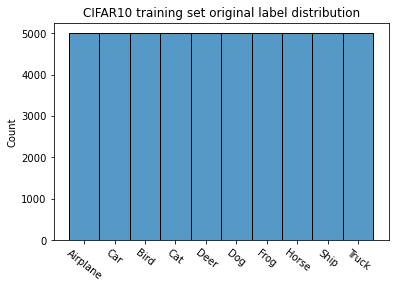

In [18]:
title = "CIFAR10 training set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=cifar10_mapping.values()
plot_label_histogram(df_cifar10_train_labels, title, bins, xticks, xticklabels)
plt.xticks(rotation=-38)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Airplane'),
  Text(1, 0, 'Car'),
  Text(2, 0, 'Bird'),
  Text(3, 0, 'Cat'),
  Text(4, 0, 'Deer'),
  Text(5, 0, 'Dog'),
  Text(6, 0, 'Frog'),
  Text(7, 0, 'Horse'),
  Text(8, 0, 'Ship'),
  Text(9, 0, 'Truck')])

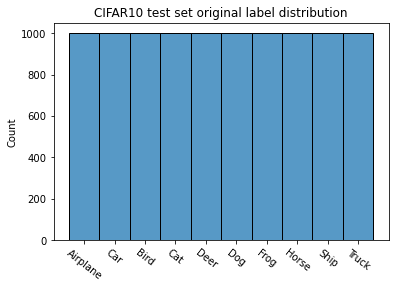

In [19]:
title = "CIFAR10 test set original label distribution"
bins=get_bins(10)
xticks=range(0, 10)
xticklabels=cifar10_mapping.values()
plot_label_histogram(df_cifar10_test_labels, title, bins, xticks, xticklabels)
plt.xticks(rotation=-38)

### Adversarial

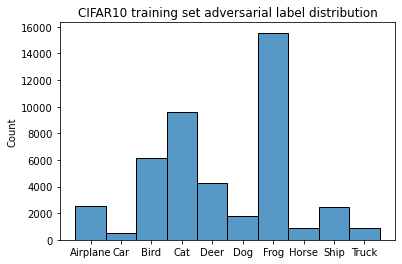

In [20]:
title = "CIFAR10 training set adversarial label distribution"
bins=get_bins(len(cifar10_mapping.values()))
xticks=range(0, len(cifar10_mapping.values()))
xticklabels=cifar10_mapping.values()
plot_label_histogram(df_cifar10_train_labels_adv, title, bins, xticks, xticklabels)

In [18]:
3000 / len(df_cifar10_test_labels_adv )

0.3563791874554526

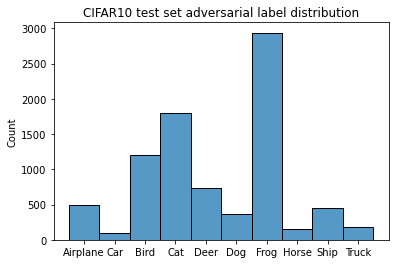

In [21]:
title = "CIFAR10 test set adversarial label distribution"
bins=get_bins(len(cifar10_mapping.values()))
xticks=range(0, len(cifar10_mapping.values()))
xticklabels=cifar10_mapping.values()
plot_label_histogram(df_cifar10_test_labels_adv, title, bins, xticks, xticklabels)

### FIndings CIFAR10
* Almost no samples were turned into Car (label=1), Horse (label=7) and Truck (label=9)
* A large fraction of samples (35.6%)  were turned into Frog (label=6)

# Q2: Which orig_labels were turned into which adv_labels?

In [20]:
mnist_train_images_orig, mnist_train_labels_orig = torch.load(os.path.join(mnist_adv_path, "training_orig.pt"))
mnist_test_images_orig, mnist_test_labels_orig = torch.load(os.path.join(mnist_adv_path, "test_orig.pt"))

In [21]:
fashion_mnist_train_images_orig, fashion_mnist_train_labels_orig = torch.load(os.path.join(fashion_mnist_adv_path, "training_orig.pt"))
fashion_mnist_test_images_orig, fashion_mnist_test_labels_orig = torch.load(os.path.join(fashion_mnist_adv_path, "test_orig.pt"))

In [22]:
cifar10_train_images_orig, cifar10_train_labels_orig = torch.load(os.path.join(cifar10_adv_path, "training_orig.pt"))
cifar10_est_images_orig, cifar10_test_labels_orig = torch.load(os.path.join(cifar10_adv_path, "test_orig.pt"))

In [43]:
def plot_orig_to_adv_heatmap(orig: torch.Tensor, adv: torch.Tensor, title: str = None, ticklabels = None):
    assert len(orig) == len(adv)
    df_orig_to_adv = pd.DataFrame([orig.numpy(), adv.numpy(), np.ones(len(adv))], index=["orig_label", "adv_label", "count"]).T
    df = df_orig_to_adv.groupby(["orig_label", "adv_label"]).count().reset_index().pivot(columns='adv_label',index='orig_label',values='count').fillna(0)
    fig = plt.figure(figsize=(10, 7))
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
    ax = sns.heatmap(df, annot=True, fmt=".0f", cmap="YlGnBu")
    if title is not None:
        plt.title(title)
    if ticklabels is not None:
        ax.set_xticklabels(ticklabels)
        ax.set_yticklabels(ticklabels)
        ax.yaxis.set_tick_params(rotation=0)

# Original to adversarial label heatmaps

## MNIST 

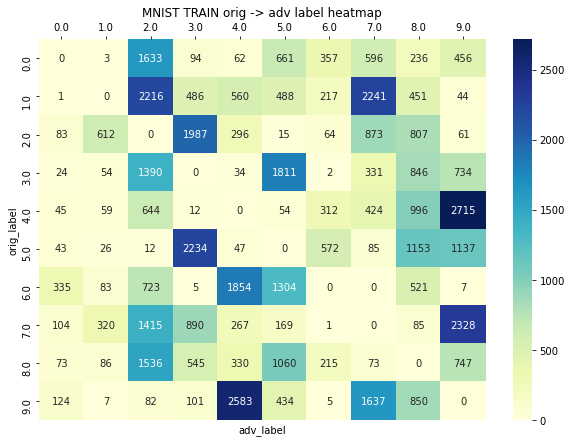

In [39]:
plot_orig_to_adv_heatmap(mnist_train_labels_orig, mnist_train_labels_adv, title="MNIST TRAIN orig -> adv label heatmap")

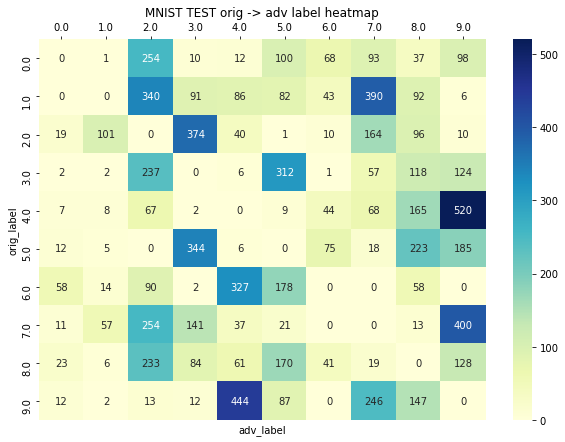

In [25]:
plot_orig_to_adv_heatmap(mnist_test_labels_orig, mnist_test_labels_adv, title="MNIST TEST orig -> adv label heatmap")

## FashionMNIST

Labels mappings:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

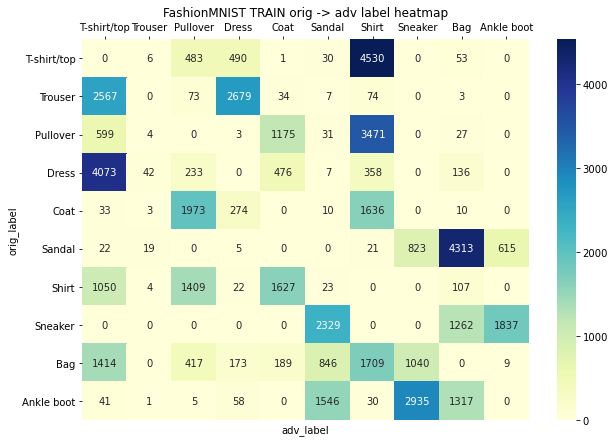

In [44]:
plot_orig_to_adv_heatmap(fashion_mnist_train_labels_orig, fashion_mnist_train_labels_adv, title="FashionMNIST TRAIN orig -> adv label heatmap", ticklabels=list(fashion_mnist_mapping.values()))

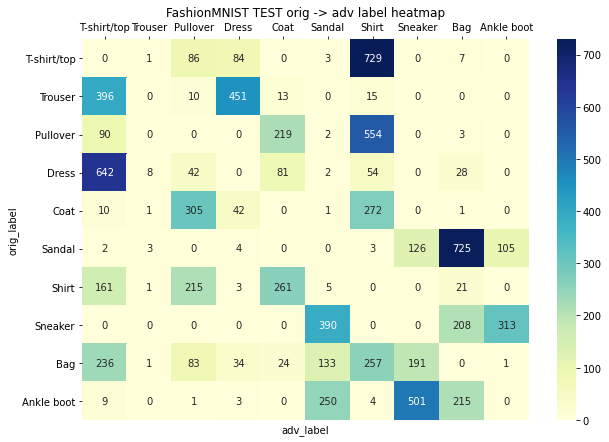

In [46]:
plot_orig_to_adv_heatmap(fashion_mnist_test_labels_orig, fashion_mnist_test_labels_adv, title="FashionMNIST TEST orig -> adv label heatmap", ticklabels=list(fashion_mnist_mapping.values()))

## FashionMNIST findings
* 0 T-Shirt => Shirt 
* 1 Trouser => T-Shirt (0) or Dress (3)
* 2 Pullover => Shirt (6) or Coat (4)
* 3 Dress => T-Shirt (0)
* 4 Coat => Pullover (2) or Shirt (6)
* 5 Sandal => Bag (8)
* 6 Shirt => Coat (4) or Pullover (2) or T-Shirt (0)
* 7 Sneaker => Sandal (5) or Ankle Boot (9)
* 8 Bag => Shirt (6) or T-Shirt (0)
* 9 Ankle Boot => Sneaker (7) or Sandal (5) or Bag (8)

## CIFAR10

Label mappings:
* 0	Airplane
* 1	Car
* 2	Bird
* 3	Cat
* 4	Deer
* 5	Dog
* 6	Frog
* 7	Horse
* 8	Ship
* 9	Truck

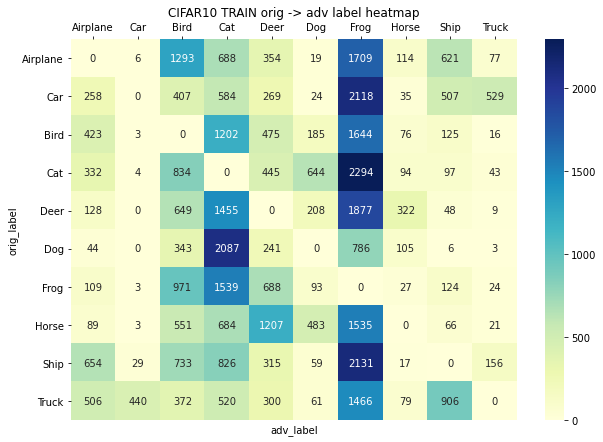

In [47]:
plot_orig_to_adv_heatmap(cifar10_train_labels_orig, cifar10_train_labels_adv, title="CIFAR10 TRAIN orig -> adv label heatmap", ticklabels=list(cifar10_mapping.values()))

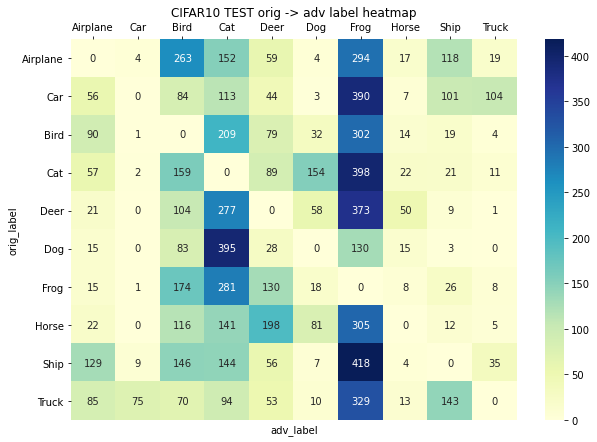

In [48]:
plot_orig_to_adv_heatmap(cifar10_test_labels_orig, cifar10_test_labels_adv, title="CIFAR10 TEST orig -> adv label heatmap", ticklabels=list(cifar10_mapping.values()))